In [43]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Importing keras
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pydot
import graphviz
from IPython.display import SVG

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Loading data
data = load_iris()

In [22]:
#Checking data
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Target'])
y = y.astype('O')
y1 = pd.get_dummies(y).values

In [23]:
#Concatenate X & y
df = pd.concat([X,y], axis = 1)

In [24]:
#Checking data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
#Checking count values of the target variable
y.value_counts()

Target
2         50
1         50
0         50
dtype: int64

In [60]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2, random_state = 0)

In [61]:
#Calling function
model = Sequential()

#Adding input and first hidden layer
model.add(Dense(units = 4, #mentioning hidden layer
                activation = 'relu', #mentioning activation function in hidden layer
                input_shape = (4,))) #mentioning input layer

#Adding output layer
model.add(Dense(units = 3, activation = 'softmax'))

In [62]:
#Configuring model training with optimization
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
#Fit the model
model.fit(X_train, y_train, batch_size=5, epochs=400)

Epoch 1/400
24/24 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.9500
Epoch 2/400
24/24 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9500
Epoch 3/400
24/24 [==============================] - 0s 1ms/step - loss: 0.1130 - accuracy: 0.9500
Epoch 4/400
24/24 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9667
Epoch 5/400
24/24 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9500
Epoch 6/400
24/24 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9500
Epoch 7/400
24/24 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9583
Epoch 8/400
24/24 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9500
Epoch 9/400
24/24 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9500
Epoch 10/400
24/24 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.9500
Epoch 11/

In [75]:
#Prediction on the model
y_pred = model.predict(X_test)

In [76]:
#Checking the data
y_pred[0:5]

array([[9.0804053e-28, 1.4123996e-03, 9.9858761e-01],
       [5.9144822e-05, 9.9244481e-01, 7.4959970e-03],
       [9.9363518e-01, 6.3636443e-03, 1.2129087e-06],
       [4.7664897e-21, 3.0158430e-02, 9.6984160e-01],
       [9.9363518e-01, 6.3636443e-03, 1.2129087e-06]], dtype=float32)

In [77]:
#Extracting class in y_test
y_test_class = np.argmax(y_test, axis = 1)
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [78]:
#Extracting class in y_pred
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

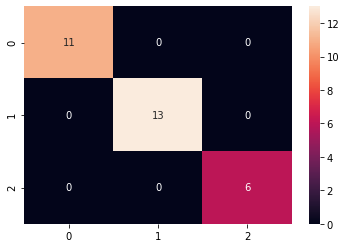

In [79]:
#Creating confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot = True)

In [80]:
#Classification report
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

